Get the previously saved textual data i.e. Document-Term Matrix or corpus. We will be needing the data and counts of words in it so DTM is better suited. We will be exploring our data on how it looks, how it is distributed overall and so on.

In [2]:
import pandas as pd

In [7]:
data = pd.read_pickle('dtm.pkl')
print(data.shape)
data.head()

(3857, 2)


,barbie,oppenheimer
aaron,16,0
ability,0,1
able,2,3
abomb,0,4
abort,0,1


In [8]:
# Let's see the top 10 words in each movie

top_10 = {}

for col in data.columns:
  top = data[col].sort_values(ascending=False).head(10)
  top_10[col] = list(zip(top.index, top.values))

top_10

{'barbie': [('barbie', 264),
  ('im', 152),
  ('ken', 120),
  ('oh', 119),
  ('just', 116),
  ('dont', 100),
  ('like', 87),
  ('know', 81),
  ('youre', 74),
  ('okay', 72)],
 'oppenheimer': [('oppenheimer', 116),
  ('im', 100),
  ('know', 97),
  ('robert', 77),
  ('dont', 76),
  ('did', 76),
  ('dr', 71),
  ('yes', 70),
  ('youre', 64),
  ('bomb', 62)]}

In [13]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 10 words per movie
words = []
for movie in data.columns:
    top = [word for (word, count) in top_10[movie]]
    for t in top:
        words.append(t)

words

['barbie',
 'im',
 'ken',
 'oh',
 'just',
 'dont',
 'like',
 'know',
 'youre',
 'okay',
 'oppenheimer',
 'im',
 'know',
 'robert',
 'dont',
 'did',
 'dr',
 'yes',
 'youre',
 'bomb']

In [14]:
Counter(words).most_common()

[('im', 2),
 ('dont', 2),
 ('know', 2),
 ('youre', 2),
 ('barbie', 1),
 ('ken', 1),
 ('oh', 1),
 ('just', 1),
 ('like', 1),
 ('okay', 1),
 ('oppenheimer', 1),
 ('robert', 1),
 ('did', 1),
 ('dr', 1),
 ('yes', 1),
 ('bomb', 1)]

In [38]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1 ] # if in both movies, remove it
add_stop_words

['im', 'dont', 'know', 'youre']

In [39]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('corpus.pkl')
data_clean


,transcript
barbie,stereotypical barbie barbie and fellow dolls r...
oppenheimer,oppenheimer is a biographical thriller film d...


In [40]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=list(stop_words))
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [41]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

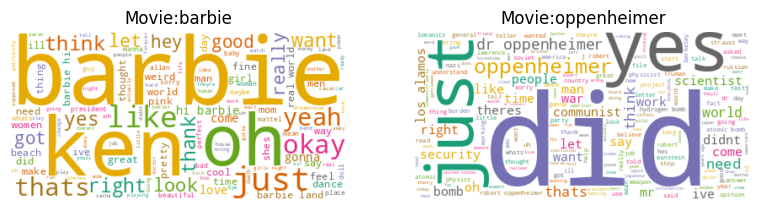

In [42]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20,20]

for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie])

    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Movie:{movie}")

plt.show()

In [43]:
## In similar ways, you can try analyse other facts about different data